# Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **19th November 2023 at 11:59 pm**. 

6. You are **not allowed to use a `for` loop in this assignment**.

7. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (2 pts).
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

In [1]:
import pandas as pd
import requests

## Fifa world cup
Read FIFA world cup attendance data from the page: https://en.wikipedia.org/wiki/FIFA_World_Cup . Use 'attendance' as the matching string to find the table. 

### 
Find the number of levels of column labels and row labels in the data.

*(2 points)*

In [9]:
url = 'https://en.wikipedia.org/wiki/FIFA_World_Cup'
response = requests.get(url)
tables = pd.read_html(response.text)
df = None
for table in tables:
    if 'attendance' in str(table).lower():
        df = table
        break
    
df.shape

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_70085/1444651734.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


(26, 9)

The attendance table has **26** rows and **9** columns 

### 
Reduce the multiple levels of column labels to a single level as follows. If the column names at all the levels are different, then concatenate the names together. Otherwise, keep the name at the outer level. For example, if the column name is ('Hosts','Hosts'), it should change to 'Hosts'. If the column name is ('Highest attendances †','Number'), it should change to 'Highest attendances †Number'. Do not rename each column manually. Use a method that will work efficiently if there were a large number of columns, say $10,000$ columns. 

**Reminder: Do not use a `for` loop.**

*(10 points)*

In [10]:
new_columns = df.columns.map(lambda col: col[0] if col[0] == col[1] else ''.join(col))
df.columns = new_columns
df.head()

,Year,Hosts,Venues/ Cities,Total attendance †,Matches,Average attendance,Highest attendances ‡Number,Highest attendances ‡Venue,Highest attendances ‡Game(s)
0,1930,Uruguay,3/1,590549.0,18,32808.0,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, semi-final"
1,1934,Italy,8/8,363000.0,17,21353.0,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, final"
2,1938,France,10/9,375700.0,18,20872.0,58455,"Olympique de Colombes, Paris","France 1–3 Italy, quarter-final"
3,1950,Brazil,6/6,1045246.0,22,47511.0,"173,850[94]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, deciding match"
4,1954,Switzerland,6/6,768607.0,26,29562.0,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, final"


## GDP per capita and population

Read the GDP per capita data from https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

### Preparing GDP per capita data

#### 
Drop all the `Year` columns. Use the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method with the `columns`, `level` and `inplace` arguments. Print the first 2 rows of the updated DataFrame. If the first row of the DataFrame has missing values for all columns, drop that row as well.

*(4 points)*

In [93]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
df = pd.read_html(url, match='GDP \(in USD\) per capita')
df = df[0]  # This is how you access the first (and likely only) DataFrame in the list
df

Country/Territory UN Region IMF[4][5]       World Bank[6]        \
    Country/Territory UN Region  Estimate  Year      Estimate  Year   
0                 NaN       NaN       NaN   NaN           NaN   NaN   
1              Monaco    Europe         —     —        234317  2021   
2       Liechtenstein    Europe         —     —        184083  2021   
3          Luxembourg    Europe    135605  2023        126426  2022   
4             Bermuda  Americas         —     —        118846  2022   
..                ...       ...       ...   ...           ...   ...   
219        Madagascar    Africa       530  2023           505  2022   
220       South Sudan    Africa       417  2023          1072  2015   
221      Sierra Leone    Africa       415  2023           461  2022   
222       Afghanistan      Asia       443  2021           364  2022   
223           Burundi    Africa       246  2023           238  2022   

    United Nations[7]        
             Estimate  Year  
0                 NaN   NaN  
1              234317  2021  
2              169260  2021  
3              133745  2021  
4              112653  2021  
..                ...   ...  
219               500  2021  
220               400  2021  
221               505  2021  
222               373  2021  
223               311  2021  

[224 rows x 8 columns]

In [94]:
df.drop('Year', axis=1, level=1, inplace=True)  # Adjust 'level' as per your DataFrame

if df.iloc[0].isna().all():
    df.drop(df.index[0], inplace=True)

df

,Country/Territory,UN Region,IMF[4][5],World Bank[6],United Nations[7]
,Country/Territory,UN Region,Estimate,Estimate,Estimate
1,Monaco,Europe,—,234317,234317
2,Liechtenstein,Europe,—,184083,169260
3,Luxembourg,Europe,135605,126426,133745
4,Bermuda,Americas,—,118846,112653
5,Ireland,Europe,112248,104039,101109
...,...,...,...,...,...
219,Madagascar,Africa,530,505,500
220,South Sudan,Africa,417,1072,400
221,Sierra Leone,Africa,415,461,505


#### 
Drop the inner level of column labels. Use the `droplevel()` method. Print the first 2 rows of the updated DataFrame.

*(4 points)*

In [95]:
df.columns = df.columns.droplevel(1)
df

,Country/Territory,UN Region,IMF[4][5],World Bank[6],United Nations[7]
1,Monaco,Europe,—,234317,234317
2,Liechtenstein,Europe,—,184083,169260
3,Luxembourg,Europe,135605,126426,133745
4,Bermuda,Americas,—,118846,112653
5,Ireland,Europe,112248,104039,101109
...,...,...,...,...,...
219,Madagascar,Africa,530,505,500
220,South Sudan,Africa,417,1072,400
221,Sierra Leone,Africa,415,461,505
222,Afghanistan,Asia,443,364,373


#### 
Convert the columns consisting of GDP per capita by *IMF, World Bank*, and the *United Nations* to numeric. Apply a lambda function on these columns to convert them to numeric. Print the number of missing values in each column of the updated DataFrame.

Note: *Do not apply the function 3 times. Apply it once on a DataFrame consisting of these 3 columns.*

*(4 points)*

In [96]:
gdp_columns = df[['IMF[4][5]', 'World Bank[6]', 'United Nations[7]']]

to_numeric = lambda x: pd.to_numeric(x, errors='coerce')

gdp_columns = gdp_columns.applymap(to_numeric)

df[['IMF[4][5]', 'World Bank[6]', 'United Nations[7]']] = gdp_columns

missing_values = df[['IMF[4][5]', 'World Bank[6]', 'United Nations[7]']].isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
IMF[4][5]            27
World Bank[6]         6
United Nations[7]     9
dtype: int64


/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_70085/954142526.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gdp_columns = gdp_columns.applymap(to_numeric)


#### 
Apply the lambda function below on all the column names of the dataset obtained in the previous question to clean the column names.

`import re`

`column_name_cleaner = lambda x:re.split(r'\[|/', x)[0]`

*Note: You will need to edit the parameter of the function, i.e., `x` in the above function to make sure it is applied on column names and not columns.*

Print the first 2 rows of the updated DataFrame.

*(5 points)*

In [97]:
import re

column_name_cleaner = lambda x:re.split(r'\[|/', x)[0]

In [98]:
# Modify the lambda function to convert column names to string before splitting
column_name_cleaner = lambda x: re.split(r'\[|/', str(x))[0]

In [99]:
column_name_cleaner = lambda x: re.split(r'\[|/', str(x))[0]

# Correct way to apply the lambda function to the column names
gdp_df.columns = [column_name_cleaner(col) for col in gdp_df.columns]

In [100]:
df.columns = [column_name_cleaner(col) for col in df.columns]

#### 
Create a new column `GDP_per_capita` that copies the GDP per capita values of the `United Nations`. If the GDP per capita is missing in the `United Nations` column, then copy it from the `World Bank` column. If the GDP per capita is missing both in the `United Nations` and the `World Bank` columns, then copy it from the `IMF` column. 

Print the number of missing values in the `GDP_per_capita` column.

*(6 points)*

In [85]:
gdp_df = gdp_df.loc[:, ~gdp_df.columns.duplicated()]

In [101]:
df

,Country,UN Region,IMF,World Bank,United Nations
1,Monaco,Europe,NaN,234317.0,234317.0
2,Liechtenstein,Europe,NaN,184083.0,169260.0
3,Luxembourg,Europe,135605.0,126426.0,133745.0
4,Bermuda,Americas,NaN,118846.0,112653.0
5,Ireland,Europe,112248.0,104039.0,101109.0
...,...,...,...,...,...
219,Madagascar,Africa,530.0,505.0,500.0
220,South Sudan,Africa,417.0,1072.0,400.0
221,Sierra Leone,Africa,415.0,461.0,505.0
222,Afghanistan,Asia,443.0,364.0,373.0


In [102]:
df['GDP_per_capita'] = df['United Nations'].fillna(df['World Bank']).fillna(df['IMF'])

missing_values = df['GDP_per_capita'].isna().sum()
print("Number of missing values in the GDP_per_capita column:", missing_values)

Number of missing values in the GDP_per_capita column: 0


####  
Drop all the columns except `Country` and `GDP_per_capita`. Print the first 2 rows of the updated DataFrame. 

*(2 points)*

In [96]:
columns_to_drop = [col for col in gdp_df.columns if col not in ['Country', 'GDP_per_capita']]
gdp_df.drop(columns=columns_to_drop, inplace=True)

gdp_df.head(2)

,Country,GDP_per_capita
1,Monaco,234317.0
2,Liechtenstein,169260.0


#### 
The country names contain some special characters *(characters other than letters)* and need to be cleaned. The following function can help clean country names:

```import re```


```country_names_clean_gdp_data = lambda x: re.sub(r'[^\w\s]', '', x).strip()```

Apply the above lambda function on the country column to clean country names. Save the cleaned dataset as `gdp_per_capita_data`. Print the first 2 rows of the updated DataFrame.

*(3 points)*

In [104]:

country_names_clean_gdp_data = lambda x: re.sub(r'[^\w\s]', '', x).strip()

gdp_per_capita_data = df.copy() 
gdp_per_capita_data['Country'] = gdp_per_capita_data['Country'].apply(country_names_clean_gdp_data)

gdp_per_capita_data.head(2)

,Country,UN Region,IMF,World Bank,United Nations,GDP_per_capita
1,Monaco,Europe,NaN,234317.0,234317.0,234317.0
2,Liechtenstein,Europe,NaN,184083.0,169260.0,169260.0


### Preparing population data

#### 
Read the population data from https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations).
Drop all columns except `Country / Area` and `Population (1 July 2023)`.

*(2 points)*

In [100]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
tables = pd.read_html(url)

population_df = tables[0]

# Rename the columns to match the required column names
population_df.rename(columns={'Country/Area': 'Country / Area', 'Population (1 July 2023)': 'Population'}, inplace=True)

population_df = population_df[['Country / Area', 'Population']]

# Print the first few rows of the DataFrame
print(population_df.head())


  Country / Area  Population
0          India  1428627663
1       China[a]  1425671352
2  United States   339996564
3      Indonesia   277534123
4       Pakistan   240485658


#### 
Apply the lambda function below on all the column names of the dataset obtained in the previous question to clean the column names.

`import re`

`column_name_cleaner = lambda x:re.split(r'\[|/|\(| ', x.name)[0]`

*Note: You will need to edit the parameter of the function, i.e., `x` in the above function to make sure it is applied on column names and not columns.*

Print the first 2 rows of the updated DataFrame.

*(5 points)*

In [101]:
population_df.columns = population_df.columns.to_series().apply(lambda x: re.split(r'\[|/|\(| ', x)[0])

In [102]:
population_df.head(2)

,Country,Population
0,India,1428627663
1,China[a],1425671352


####  
The country names contain some special characters *(characters other than letters)* and need to be cleaned. The following function can help clean country names:

```import re```

```country_names_clean_population_data = lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip()```

Apply the above lambda function on the country column to clean country names. Save the cleaned dataset as `population_data`.

*(3 points)*

In [106]:
country_names_clean_population_data = lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip()

In [107]:
# Adjust the column name based on the actual column name in your DataFrame
population_df['Country'] = population_df['Country'].apply(country_names_clean_population_data)

# Save the cleaned dataset as population_data
population_data = population_df

# Print the first few rows of the updated DataFrame
print(population_data.head())

         Country  Population
0          India  1428627663
1          China  1425671352
2  United States   339996564
3      Indonesia   277534123
4       Pakistan   240485658


/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_39872/1222512481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df['Country'] = population_df['Country'].apply(country_names_clean_population_data)


### Merging GDP per capita and population datasets

#### 
Merge `gdp_per_capita_data` with `population_data` to get the population and GDP per capita of countries in a single dataset. Print the first two rows of the merged DataFrame.

Assume that:

1. We want to keep the GDP per capita of all countries in the merged dataset, even if their population in unavailable in the population dataset. For countries whose population in unavailable, their `Population` column will show `NA`.

2. We want to discard an observation of a country if its GDP per capita is unavailable.

*(4 points)*

In [109]:
merged_data = pd.merge(gdp_per_capita_data, population_data, on='Country', how='left')

# Print the first two rows of the merged DataFrame
print(merged_data.head(2))

# Count the number of countries in gdp_per_capita_data with missing Population
missing_population_count = merged_data['Population'].isna().sum()
print(f"For {missing_population_count} countries in gdp_per_capita_data, the population seems to be unavailable in population_data.")

         Country  GDP_per_capita  Population
0         Monaco        234317.0     36298.0
1  Liechtenstein        169260.0     39585.0
For 10 countries in gdp_per_capita_data, the population seems to be unavailable in population_data.


####  
For how many countries in `gdp_per_capita_data` does the population seem to be unavailable in `population_data`? Note that you don't need to clean country names any further than cleaned by the functions provided.

Print the observations of `gdp_per_capita_data` with missing `Population`.

*(3 points)*

In [110]:
observations_with_missing_population = merged_data[merged_data['Population'].isna()]
print(observations_with_missing_population)

                      Country  GDP_per_capita  Population
15            Channel Islands         67961.0         NaN
23                      Macau         43555.0         NaN
35          European Unionn 1         31875.0         NaN
36          US Virgin Islands         39552.0         NaN
41    Sint Maarten Dutch part         26199.0         NaN
55             Czech Republic         26809.0         NaN
63   Saint Martin French part         21921.0         NaN
186                TimorLeste          1517.0         NaN
195                  Zanzibar          1211.0         NaN
200              GuineaBissau           759.0         NaN


### Merging datasets with *similar* values in the *key* column

We suspect that population of more countries may be available in `population_data`. However, due to unclean country names, the observations could not merge. For example, the country *Guinea Bissau* is mentioned as *GuineaBissau* in `gdp_per_capita_data` and *Guinea-Bissau* in `population_data`. To resolve this issue, we'll use a different approach to merge datasts. We'll merge the population of a country to an observation in the GDP per capita dataset, whose name in `population_data` is the most *'similar'* to the name of the country in `gdp_per_capita_data`. 

#### 
Proceed as follows:

1. For each country in `gdp_per_capita_data`, find the `country` with the most *'similar'* name in `population_data`, based on the similarity score. Use the lambda function provided below to compute the similarity score between two strings *(The higher the score, the more similar are the strings. The similarity score is $1.0$ if two strings are exactly the same).*


2. Merge the population of the most *'similar'* country to the country in `gdp_per_capita_data`. The merged dataset must include 5 columns - the country name as it appears in `gdp_per_capita_data`, the GDP per capita, the country name of the most *'similar'* country as it appears in `population_data`, the population of that country, and the similarity score between the country names. 


3. After creating the merged dataset, **print** the rows of the dataset that have similarity scores less than 1.

Use the function below to compute the similarity score between the `Country` names of the two datasets:

`from difflib import SequenceMatcher`

`similar = lambda a,b: SequenceMatcher(None, a, b).ratio()`

**Note: You may use one `for` loop only for this particular question. However, if don't use a `for` loop, you will get 10 bonus points.**

*(18 points)*

**Hint:**

1. Define a function that computes the index of the observation having the most *'similar'* country name in `population_data` for an observation in `gdp_per_capita_data`. The function returns a Series consisting of the most *'similar'* country name, its population, and its similarity score *(This function can be written with only one line in its body, excluding the return statement and the definition statement. However, you may use as many lines as you wish)*.


2. Apply the function on the `Country` column of `gdp_per_capita_data`. A DataFrame will be obtained.


3. Concatenate the DataFrame obtained in (2) with `gdp_per_capita_data` with the pandas `concat()` function.

In [114]:
from difflib import SequenceMatcher

# Define a function to compute the similarity score between two strings
similar = lambda a, b: SequenceMatcher(None, a, b).ratio()

# Define a function to find the most similar country in population_data and return relevant data
def find_most_similar(row):
    similarity_data = population_data.apply(lambda x: (x['Country'], x['Population'], similar(row['Country'], x['Country'])), axis=1)
    most_similar = max(similarity_data, key=lambda x: x[2])  # Find the max similarity score
    return pd.Series({'Country Name (Population)': most_similar[0],
                      'Population': most_similar[1],
                      'Similarity Score': most_similar[2]})

# Apply the find_most_similar function to the 'Country / Area' column of gdp_per_capita_data
similar_data = gdp_per_capita_data.apply(find_most_similar, axis=1)

# Concatenate the similar_data DataFrame with gdp_per_capita_data
merged_data = pd.concat([gdp_per_capita_data, similar_data], axis=1)

# Print the rows with similarity scores less than 1
low_similarity_rows = merged_data[merged_data['Similarity Score'] < 1]
print(low_similarity_rows)


                      Country  GDP_per_capita Country Name (Population)  \
16            Channel Islands         67961.0            Cayman Islands   
24                      Macau         43555.0                     Macao   
36          European Unionn 1         31875.0               Puerto Rico   
37          US Virgin Islands         39552.0       U.S. Virgin Islands   
42    Sint Maarten Dutch part         26199.0              Sint Maarten   
56             Czech Republic         26809.0  Central African Republic   
64   Saint Martin French part         21921.0              Saint Martin   
187                TimorLeste          1517.0                East Timor   
196                  Zanzibar          1211.0                  Tanzania   
201              GuineaBissau           759.0             Guinea-Bissau   

     Population  Similarity Score  
16        69310          0.758621  
24       704150          0.800000  
36      3260314          0.428571  
37        98750          0.944

#### 
In the dataset obtained in the previous question, for all observations where similarity score is less than 0.8, replace the population with `Nan`.

Print the observations of the dataset having missing values of population.

*(2 points)*

In [116]:
merged_data.loc[merged_data['Similarity Score'] < 0.8, 'Population'] = pd.NA

# Print the observations with missing values of population
observations_with_missing_population = merged_data[merged_data['Population'].isna()]
observations_with_missing_population

,Country,GDP_per_capita,Country Name (Population),Population,Similarity Score
16,Channel Islands,67961.0,Cayman Islands,NaN,0.758621
36,European Unionn 1,31875.0,Puerto Rico,NaN,0.428571
42,Sint Maarten Dutch part,26199.0,Sint Maarten,NaN,0.685714
56,Czech Republic,26809.0,Central African Republic,NaN,0.631579
64,Saint Martin French part,21921.0,Saint Martin,NaN,0.666667
187,TimorLeste,1517.0,East Timor,NaN,0.500000
196,Zanzibar,1211.0,Tanzania,NaN,0.625000


## GDP, surplus, and compensation

The dataset *Real GDP.csv* contains the GDP of each US State for all years starting from 1997 until 2020. The data is at *State* level, i.e., each observation corresponds to a unique State.

The dataset *Surplus.csv* contains the surplus of each US State for all years starting from 1997 until 2020. The data is at *year* level, i.e., each observation corresponds to a unique year.

The dataset *Compensation.csv* contains *Compensation* and *Chain-type quantity indexes for real GDP* for each US State and year starting from 1997 to 2020. The dataset is at *Year-State-Description* level, i.e., each observation corresponds to a unique `Year`-`State`-`Description` combination where `Description` refers to either *Compensation* or *Chain-type quantity indexes for real GDP*. 

In [118]:
gdp_data = pd.read_csv('Real GDP.csv')
surplus_data = pd.read_csv('Surplus.csv')
compensation_data = pd.read_csv('Compensation.csv')
state_region_data = pd.read_csv('State_region_mapping.csv')

# Displaying the first few rows of each dataset to understand their structure
gdp_data.head(), surplus_data.head(), compensation_data.head(), state_region_data.head()

(                                   Description       State       1997  \
 0  Real GDP (millions of chained 2012 dollars)     Alabama   144501.2   
 1  Real GDP (millions of chained 2012 dollars)      Alaska    42211.3   
 2  Real GDP (millions of chained 2012 dollars)     Arizona   168408.8   
 3  Real GDP (millions of chained 2012 dollars)    Arkansas    82571.3   
 4  Real GDP (millions of chained 2012 dollars)  California  1378276.5   
 
         1998       1999       2000       2001       2002       2003  \
 0   149568.2   154900.2   157221.3   156853.2   160422.4   165134.7   
 1    41095.9    40590.5    39406.6    40958.7    42979.0    42355.3   
 2   183060.5   198699.9   208439.5   213166.2   220696.7   234065.9   
 3    84570.8    89115.2    89871.7    89789.0    92950.5    96944.5   
 4  1468730.8  1574305.9  1696172.4  1692324.1  1722522.4  1789998.5   
 
         2004  ...       2011       2012       2013       2014       2015  \
 0   176625.0  ...   187605.8   189245.5   

### Combining datasets
Combine all these datasets to obtain a dataset at *State-Year* level, i.e., each observation corresponds to a unique `State`-`Year` combination. The combined dataset must contain the GDP, surplus, *Compensation*, and *Chain-type quantity indexes for real GDP* for each US State and all years starting from 1997 until 2020. *Note that each observation must contain the name of the US State, year, and the four values (GDP, surplus, compensation, and Chain-type quantity indexes for real GDP).*

**Hint**: Here is one way to do it:

1. Melt the GDP dataset to year-State level 

2. Melt the Surplus dataset to year-State level 

3. Pivot the compensation dataset to year-State level

4. Now that all the datasets are at the year-State level, merge them!

*(3 + 3 + 3 + 1 = 10 points)*

In [125]:
# Adjusting the melt for the GDP data to exclude the 'Description' column
gdp_melted = gdp_data.drop(columns=['Description']).melt(id_vars=["State"], var_name="Year", value_name="GDP")

# Converting the 'Year' column to integer for both GDP and Surplus datasets
gdp_melted['Year'] = gdp_melted['Year'].astype(int)
surplus_melted['Year'] = surplus_melted['Year'].astype(int)

# Displaying the first few rows of the reshaped datasets
gdp_melted.head(), surplus_melted.head()

(        State  Year        GDP
 0     Alabama  1997   144501.2
 1      Alaska  1997    42211.3
 2     Arizona  1997   168408.8
 3    Arkansas  1997    82571.3
 4  California  1997  1378276.5,
    Year    State  Surplus
 0  1997  Alabama  37247.9
 1  1998  Alabama  39368.1
 2  1999  Alabama  41513.7
 3  2000  Alabama  42583.4
 4  2001  Alabama  43348.6)

In [126]:
# Pivot the compensation dataset to year-State level
compensation_pivoted = compensation_data.pivot_table(index=['Year', 'State'], columns='Description', values='value').reset_index()

# Now that all the datasets are at the year-State level, merge them!
combined_data = pd.merge(gdp_melted, surplus_melted, on=['Year', 'State'], how='outer')
combined_data = pd.merge(combined_data, compensation_pivoted, on=['Year', 'State'], how='outer')

In [127]:
combined_data.head()

,State,Year,GDP,Surplus,Chain-type quantity indexes for real GDP,Compensation (millions of dollars)
0,Alabama,1997,144501.2,37247.9,76.356,61083.8
1,Alaska,1997,42211.3,11061.3,72.424,12347.8
2,Arizona,1997,168408.8,53776.0,62.043,69876.9
3,Arkansas,1997,82571.3,23316.0,76.108,32715.5
4,California,1997,1378276.5,431069.4,65.225,574432.9


### Time trend: GDP, surplus, and compensation
Use a single plot to answer all three questions below by visualizing: 

1. How does the mean GDP (mean over all States) change with year? *(1 point for visualization)* 

2. How does the mean compensation (mean over all States) change with year? *(1 point for visualization)* 

3. How does the mean surplus (mean over all States) change with year? *(1 point for visualization)*

Also show the 95% confidence interval for the mean GDP, mean compensation, and mean surplus in the plot.

**Hint:** Use the *seaborn* function `lineplot()` . No calculations are needed. Just use `lineplot()` three times. 

*(4 points)*

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_39872/2648038944.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='GDP', estimator='mean', ci=95, label='Mean GDP')
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

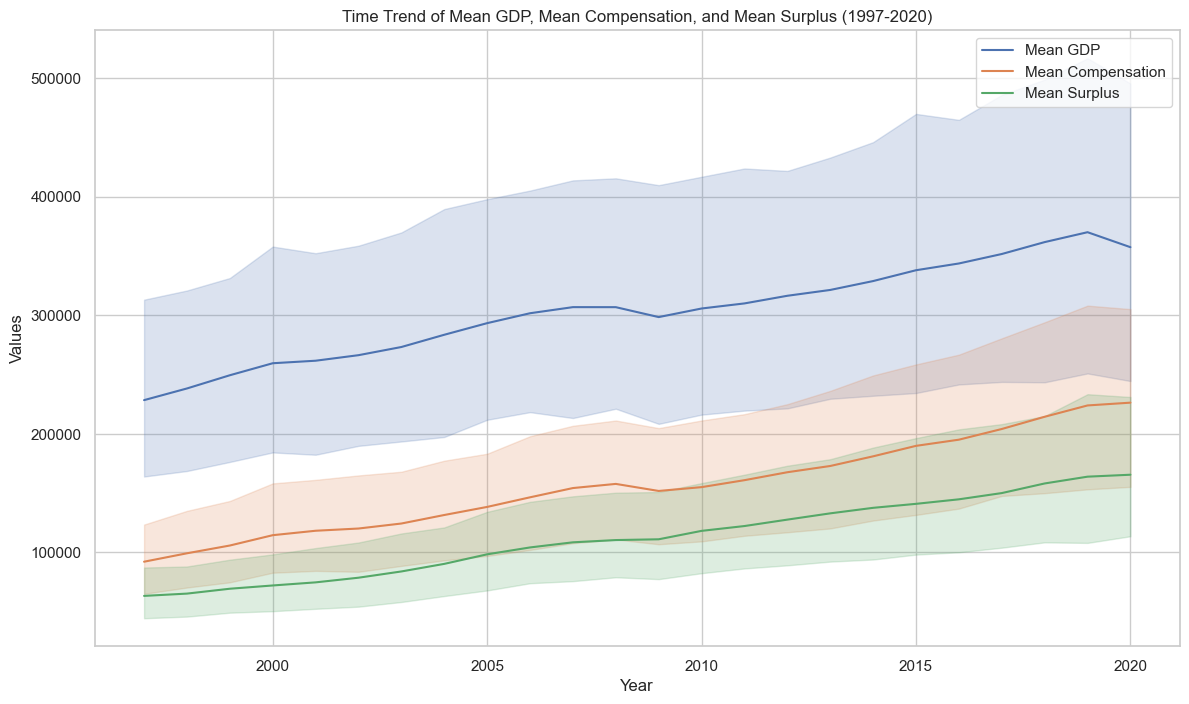

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Creating a plot with mean GDP, mean compensation, and mean surplus over the years
plt.figure(figsize=(14, 8))

# Plotting mean GDP
sns.lineplot(data=combined_data, x='Year', y='GDP', estimator='mean', ci=95, label='Mean GDP')

# Plotting mean compensation
sns.lineplot(data=combined_data, x='Year', y='Compensation (millions of dollars)', estimator='mean', ci=95, label='Mean Compensation')

# Plotting mean surplus
sns.lineplot(data=combined_data, x='Year', y='Surplus', estimator='mean', ci=95, label='Mean Surplus')

# Setting plot title and labels
plt.title('Time Trend of Mean GDP, Mean Compensation, and Mean Surplus (1997-2020)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_39872/2336589931.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data_with_region, x='Year', y='GDP', hue='Region', estimator='mean', ci=None)
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstanc

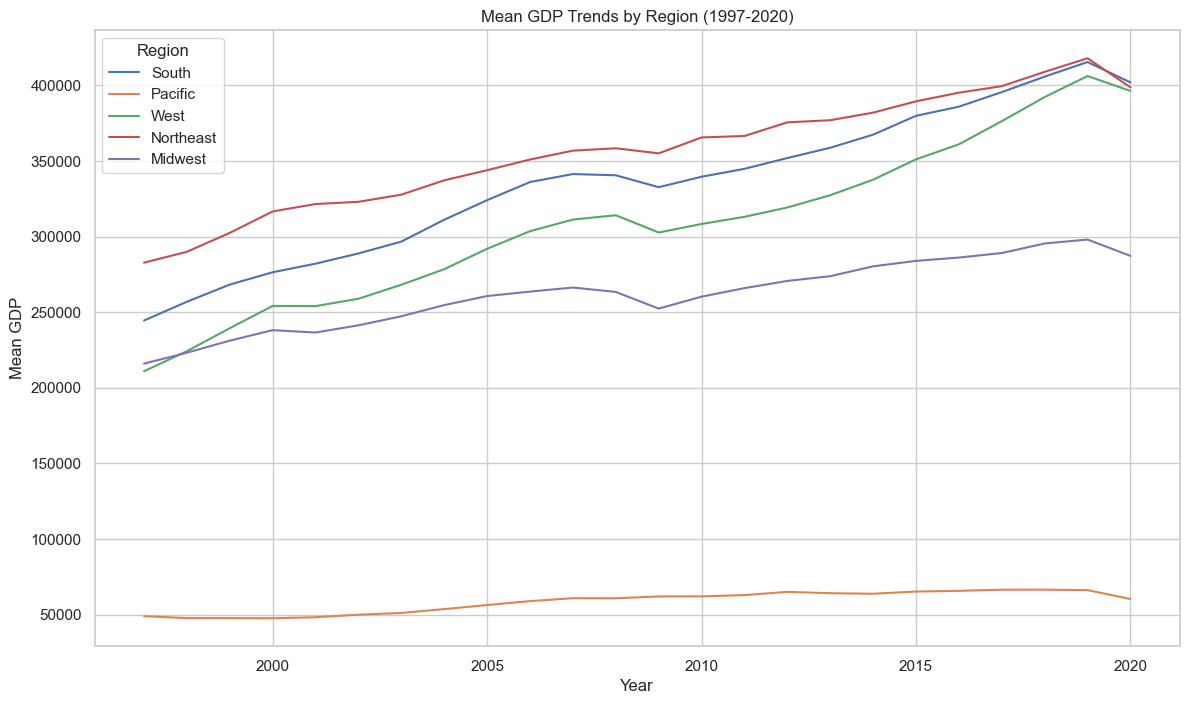

In [131]:
# Merging the state-region mapping with the combined dataset
combined_data_with_region = pd.merge(combined_data, state_region_data, on='State', how='left')

# Creating a line plot to show the mean GDP for each region over the years
plt.figure(figsize=(14, 8))

# Plotting mean GDP for each region
sns.lineplot(data=combined_data_with_region, x='Year', y='GDP', hue='Region', estimator='mean', ci=None)

# Setting plot title and labels
plt.title('Mean GDP Trends by Region (1997-2020)')
plt.xlabel('Year')
plt.ylabel('Mean GDP')
plt.legend(title='Region')
plt.show()


### Time trend: GDP with region
Merge the file *State_region_mapping.csv* with the dataset obtained in the previous question. Make a lineplot showing the mean GDP for each of the five regions with year. Do not display the confidence interval. Which two regions seems to have the least growth in GDP over the past 24 years? 

*(4 points)*

The graph shows the Mean GDP Trends by Region from 1997 to 2020. The two regions with the least growth in GDP over the past 24 years are: Midwest and Pacific regions.


These assessments are made by observing the slope of the lines representing each region. A steeper slope would indicate a higher growth rate, while a flatter slope suggests less growth. The **Midwest** and the **Pacific** have the flattest slopes among all the regions displayed, which signifies that they have the least growth in GDP.

In [132]:
# Check
# Calculating the annual mean GDP for each region for the years 1997 and 2020
gdp_1997 = combined_data_with_region[combined_data_with_region['Year'] == 1997].groupby('Region')['GDP'].mean()
gdp_2020 = combined_data_with_region[combined_data_with_region['Year'] == 2020].groupby('Region')['GDP'].mean()

# Calculating the growth rate for each region
growth_rate = ((gdp_2020 - gdp_1997) / gdp_1997) * 100

# Displaying the growth rates
growth_rate.sort_values(ascending=False)

Region
West         87.851307
South        64.395956
Northeast    40.992449
Midwest      32.988617
Pacific      23.231734
Name: GDP, dtype: float64